# Stack graphs for simulation output

In [1]:
import os
from collections import namedtuple

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

# Seaborn/matplotlib plot settings
sns.set()
sns.set_context('paper', font_scale=2.15)

plt.rcParams["figure.figsize"] = (12,6)
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 18
        }
mpl.rc('font', **font)

GenerationType = namedtuple('GenerationType',
                            [
                           'label',
                           'color',
                            ]
                           )
# Colors from MAGMA (R color names)
GENERATION_TYPES = {
    'Z': GenerationType('Battery', '#42F1F4'),  # no color assigned
    'N': GenerationType('Nuclear', '#b22222'),
    'E': GenerationType('Geothermal', '#CDE7B0'),  # no color assigned
    'B': GenerationType('Biomass', '#A3BFA8'),  # no color assigned
    'C': GenerationType('Coal', '#333333'),
    'G': GenerationType('Gas', '#6e8b3d'),
    'O': GenerationType('Oil', '#eea2ad'),
    'H': GenerationType('Hydro', '#add8e6'),
    'W': GenerationType('Wind', '#4f94cd'),
    'S': GenerationType('Solar', '#ffb90f'),
}

FUEL_TO_CODE = {
    'Oil': 'O',
    'Coal': 'C',
    'NG': 'G',
    'Nuclear': 'N',
    'Hydro': 'H',
    'Solar': 'S',
    'Wind': 'W',
               }

In [2]:
def _fuel_type_to_code(x):
    code = FUEL_TO_CODE.get(x, '')
    
    return code

## Grab some simulator output

In [3]:
case_prefix = 'rts-gmlc_deterministic'

RESULTS_DIR = os.path.join('data', case_prefix)

# Set the directory to save figures
FIGS_DIR = os.path.join('report', 'figs')

In [4]:
RTS_SOURCE_DIR = os.path.join('..', '..', '..', 'RTS-GMLC', 'RTS_DATA', 'SourceData')
gens_table = pd.read_csv(os.path.join(RTS_SOURCE_DIR, 'gen.csv'))

gens_table['gen type'] = gens_table['Fuel'].apply(_fuel_type_to_code)
gens_table.set_index('GEN UID', inplace=True)
gens_dict = gens_table.to_dict(orient='index')

In [5]:
gens_table['Fuel'].unique()

array(['Oil', 'Coal', 'NG', 'Sync_Cond', 'Nuclear', 'Hydro', 'Solar',
       'Wind', 'Storage'], dtype=object)

In [6]:
hourly_summary = pd.read_csv(os.path.join(RESULTS_DIR, 'hourly_summary.csv'))
hourly_gen_summary = pd.read_csv(os.path.join(RESULTS_DIR, 'Hourly_gen_summary.csv'))
thermal_detail = pd.read_csv(os.path.join(RESULTS_DIR, 'thermal_detail.csv'))
renewables_detail = pd.read_csv(os.path.join(RESULTS_DIR, 'renewables_detail.csv'))

thermal_detail['gen type'] = thermal_detail['Generator'].apply(lambda x: gens_dict[x]['gen type'])
renewables_detail['gen type'] = renewables_detail['Generator'].apply(lambda x: gens_dict[x]['gen type'])

In [7]:
DATE = thermal_detail['Date'].unique()[0]
SAMPLE_DAY = thermal_detail.loc[thermal_detail['Date'] == DATE]

In [62]:
renewables_detail

,Curtailment,Date,Generator,Hour,Output,Output DA,Unit Market Revenue,Unit Uplift Payment,gen type
0,0.000000,2020-07-10,101_PV_1,1,0.000000,NaN,NaN,NaN,S
1,0.000000,2020-07-10,101_PV_2,1,0.000000,NaN,NaN,NaN,S
2,0.000000,2020-07-10,101_PV_3,1,0.000000,NaN,NaN,NaN,S
3,0.000000,2020-07-10,101_PV_4,1,0.000000,NaN,NaN,NaN,S
4,0.000000,2020-07-10,102_PV_1,1,0.000000,NaN,NaN,NaN,S
5,0.000000,2020-07-10,102_PV_2,1,0.000000,NaN,NaN,NaN,S
6,0.000000,2020-07-10,103_PV_1,1,0.000000,NaN,NaN,NaN,S
7,0.000000,2020-07-10,104_PV_1,1,0.000000,NaN,NaN,NaN,S
8,0.000000,2020-07-10,113_PV_1,1,0.000000,NaN,NaN,NaN,S
9,0.000000,2020-07-10,118_RTPV_1,1,0.000000,NaN,NaN,NaN,S


In [41]:
thermal_detail_records = []

for thermal_gen in thermal_detail['Generator'].unique():
    gen_type = gens_dict[thermal_gen]['gen type']
    dispatch_levels = thermal_detail.loc[thermal_detail['Generator'] == thermal_gen]['Dispatch'].values
    
    gen_record = {
        'Name': thermal_gen,
        'Type': gen_type,
        'Output': dispatch_levels,
                 }
    thermal_detail_records.append(gen_record)

# thermal_detail_records

[{'Name': '101_CT_1',
  'Type': 'O',
  'Output': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'Name': '101_CT_2',
  'Type': 'O',
  'Output': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [59]:
def generate_stack_graph(thermal_data, renewables_data, hourly_summary, gen_summary, bar_width=0.9, title='', 
                         plot_individual_generators=False,
                         show_individual_components=False):
    """Creates a stack graph."""    
    def _compute_total_dispatch_per_hour(gen_type):
        """Computes the total dispatch for gen_type generation for each hour in the data set."""
        total_output_by_hour = []
        
        if gen_type in {'S', 'W', 'H'}:
            gen_details = renewables_data
            
            for h in gen_details['Hour'].unique():
                total_hour_output = gen_details.loc[(gen_details['gen type'] == gen_type) & (gen_details['Hour'] == h)]['Output'].sum()
                total_output_by_hour.append(total_hour_output)
        else:
            gen_details = thermal_data
            
            for h in gen_details['Hour'].unique():
                total_hour_output = gen_details.loc[(gen_details['gen type'] == gen_type) & (gen_details['Hour'] == h)]['Dispatch'].sum()
                total_output_by_hour.append(total_hour_output)
                
        return total_output_by_hour

    def _plot_generation_stack_components():
        """
        Plots the stack graph components for generation. 
        If plot_individual_generators is True, each individual generator's output will be keyed.
        If show_individual_components is True, components of each generation type will be broken out. This option is only relevant when plot_individual_generators is False.
        """
        if plot_individual_generators and show_individual_components:
            raise Exception('plot_individual_generators and show_individual_components cannot be simultaneously True.')
            return
        
        bottom = np.zeros(len(indices))
        
        if plot_individual_generators:      
            for gen_type, gen_type_tuple in GENERATION_TYPES.items():
                if gen_type in {'S', 'W', 'H'}:
                    gen_details = renewables_data
                    output_field_name = 'Output'
                else:
                    gen_details = thermal_data
                    output_field_name = 'Dispatch'

                generator_list = gen_details.loc[gen_details['gen type'] == gen_type]['Generator'].unique()

                for ix, gen in enumerate(generator_list, start=0):
                    gen_hourly_output = gen_details.loc[(gen_details['Generator'] == gen)][output_field_name].values

                    ax.bar(indices, gen_hourly_output, bar_width, bottom=bottom, 
                           edgecolor=None, linewidth=0, 
                           label=gen)

                    # Update "bottom" position for each stack. 
                    bottom += gen_hourly_output        
        elif show_individual_components:
            # Plot by individual generator in groups of generation type.
            for gen_type, gen_type_tuple in GENERATION_TYPES.items():
                component_color = gen_type_tuple.color
                vals = _compute_total_dispatch_per_hour(gen_type)

                if sum(vals) <= 0.0:
                    continue

                if gen_type in {'S', 'W', 'H'}:
                    gen_details = renewables_data
                    output_field_name = 'Output'
                else:
                    gen_details = thermal_data
                    output_field_name = 'Dispatch'

                generator_list = gen_details.loc[gen_details['gen type'] == gen_type]['Generator'].unique()

                for ix, gen in enumerate(generator_list, start=0):
                    gen_hourly_output = gen_details.loc[(gen_details['Generator'] == gen)][output_field_name].values

                    # Plot set of bar stack component.
                    if ix == 0:
                        ax.bar(indices, gen_hourly_output, bar_width, bottom=bottom, color=component_color, label=gen_type_tuple.label,
                              edgecolor='#FFFFFF', linewidth=0.5)
                    else:
                        ax.bar(indices, gen_hourly_output, bar_width, bottom=bottom, color=component_color,
                              edgecolor='#FFFFFF', linewidth=0.5)

                    # Update "bottom" position for each stack. 
                    bottom += gen_hourly_output
        else:    
            for gen_type, gen_type_tuple in GENERATION_TYPES.items():
                component_color = gen_type_tuple.color
                vals = _compute_total_dispatch_per_hour(gen_type)

                # Skip if none of the generation type is present.
                if sum(vals) <= 0.0:
                    continue

                # Plot set of bar stack component.
                ax.bar(indices, vals, bar_width, bottom=bottom, color=component_color, label=gen_type_tuple.label,
                      linewidth=0)

                # Update "bottom" position for each stack. 
                bottom += vals
        
        return bottom

    fig, ax = plt.subplots(figsize=(16, 8))

    indices = np.arange(24)
    labels = [str(ix+1) for ix in indices]
                
    # Plot generation dispatch/output.
    total_dispatch_levels = _plot_generation_stack_components()
    bottom = total_dispatch_levels
    
    # Plot load shedding, if applicable.    
    load_shed_by_hour = hourly_summary[' LoadShedding '].values
    
    if sum(load_shed_by_hour) > 0.0:
        component_color = '#ffff00'
        ax.bar(indices, load_shed_by_hour, bar_width, bottom=bottom, color=component_color, 
               edgecolor=None, linewidth=0,                
               label='Load Shedding')
        bottom += load_shed_by_hour   

    # Plot demand.
    demand_by_hour = hourly_summary[' Demand '].values
    
    ## This is to make it so the step graph covers the total dispatch levels as expected.
    demand_indices = np.arange(25) - 1/2
    demand_by_hour = np.append(demand_by_hour, demand_by_hour[-1])
    
    ax.step(demand_indices, demand_by_hour, linewidth=3, color='#000000', where='post')
    
    # Add reserve requirements, if applicable.
    # TODO: Don't have this explicitly in the output files
    reserve_requirements_by_hour = np.zeros(len(indices))
#     reserve_requirements_by_hour = [0.15*hour_demand for hour_demand in demand_by_hour]
    
    if sum(reserve_requirements_by_hour) > 0.0:
        component_color = '#00c2ff'
        ax.bar(indices, reserve_requirements_by_hour, bar_width, bottom=bottom, color=component_color, 
               edgecolor=None, linewidth=0, 
               label='Required Reserve')
        bottom += reserve_requirements_by_hour
    
    # Add reserve shortfalls, if applicable.
    reserve_shortfall_by_hour = hourly_summary[' ReserveShortfall '].values
#     reserve_shortfall_by_hour = np.random.randint(0, 500, size=len(indices))
    
    if sum(reserve_shortfall_by_hour) > 0.0:
        component_color = '#ff00ff'
        ax.bar(indices, reserve_shortfall_by_hour, bar_width, bottom=bottom, color=component_color, 
               edgecolor=None, linewidth=0, 
               label='Reserve Shortfall')
        bottom += reserve_shortfall_by_hour
    
    # Add implicit reserves, if applicable.
    # TODO:
    reserve_available_by_hour = gen_summary['Available reserves'].values
    implicit_reserves_by_hour = [max(0.0, reserve_available_by_hour[ix] - reserve_requirements_by_hour[ix]) for ix in range(len(reserve_available_by_hour))]

    if sum(reserve_requirements_by_hour) > 0.0:
        component_color = '#00ffc7'
        ax.bar(indices, implicit_reserves_by_hour, bar_width, bottom=bottom, color=component_color, 
               edgecolor=None, linewidth=0, 
               label='Implicit Reserve')
        bottom += implicit_reserves_by_hour
    
    # Add quick-start capacity, if applicable.
    # TODO:
    quickstart_capacity_by_hour = np.zeros(len(indices))
#     quickstart_capacity_by_hour = np.random.randint(0, 500, size=len(indices))
    
    if sum(quickstart_capacity_by_hour) > 0.0:
        component_color = '#494949'
        ax.bar(indices, quickstart_capacity_by_hour, bar_width, bottom=bottom, color=component_color, 
               edgecolor=None, linewidth=0, 
               label='Available Quick Start')
        bottom += quickstart_capacity_by_hour
    
    # TODO:
    quickstart_additional_power_by_hour = np.zeros(len(indices))
#     quickstart_additional_power_by_hour = np.random.randint(0, 400, size=len(indices))
    
    if sum(quickstart_additional_power_by_hour) > 0.0:
        component_color = '#0061ff'
        ax.bar(indices, quickstart_additional_power_by_hour, bar_width, bottom=bottom, color=component_color, 
               edgecolor='#000000', linewidth=0, hatch='xxx', 
               label='Quick-Start Generator Output')
        bottom += quickstart_additional_power_by_hour
        
#         mpl.rcParams['hatch.color'] = 'red'
#         mpl.rcParams['hatch.linewidth'] = 1.0
    
    # Add renewable curtailment.
    renewable_curtailment_by_hour = np.zeros(len(indices))
    renewable_curtailment_by_hour = hourly_summary[' RenewablesCurtailed '].values
    
    if sum(renewable_curtailment_by_hour) > 0.0:
        component_color = '#ff0000'
        ax.bar(indices, renewable_curtailment_by_hour, bar_width, bottom=bottom, color=component_color, 
               edgecolor=None, linewidth=0, 
               label='Renewables Curtailed')
        bottom += renewable_curtailment_by_hour
    
    # Labels and such.
    plt.xticks(indices, labels, rotation=0)
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine(offset=10, trim=True)

    # Put legend outside on the right.
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(title)
    ax.set_ylabel('Power [MW]')
    ax.set_xlabel('Hour')
    ax.yaxis.grid(True)

    return fig, ax

## Sample stack graph

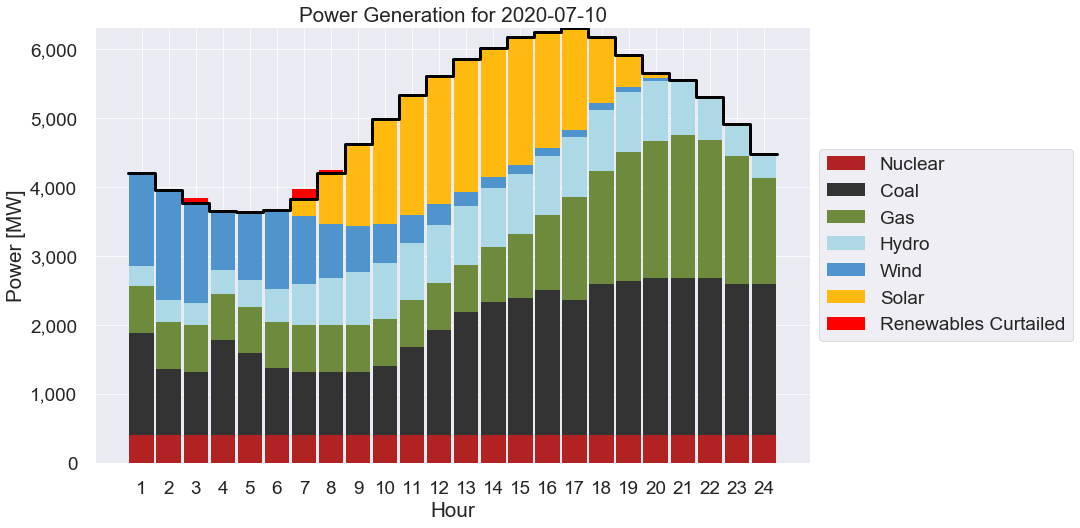

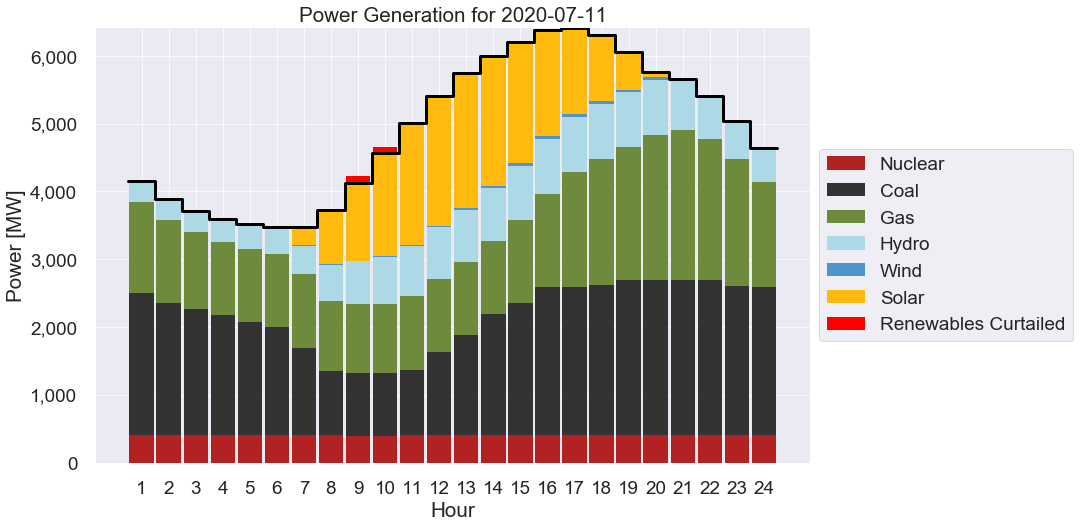

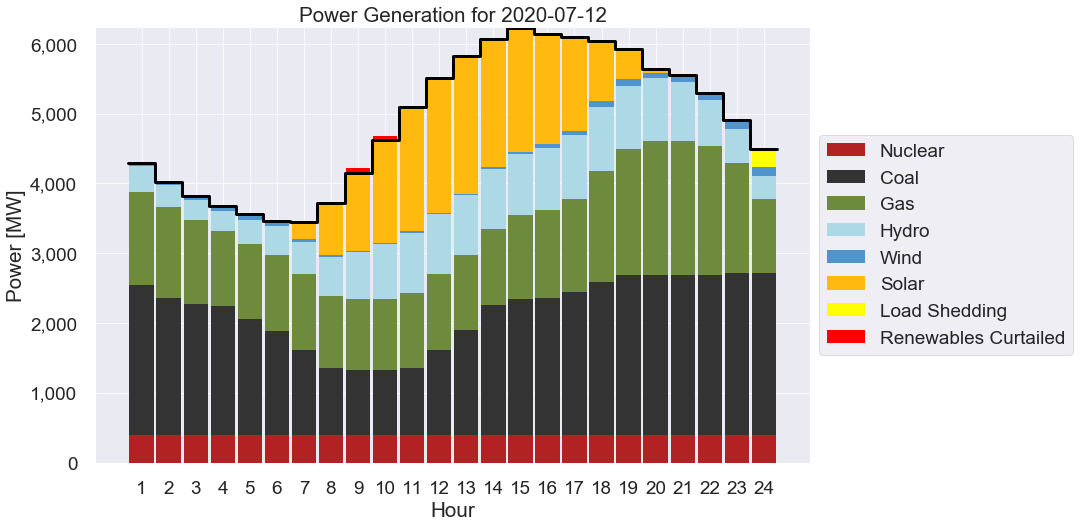

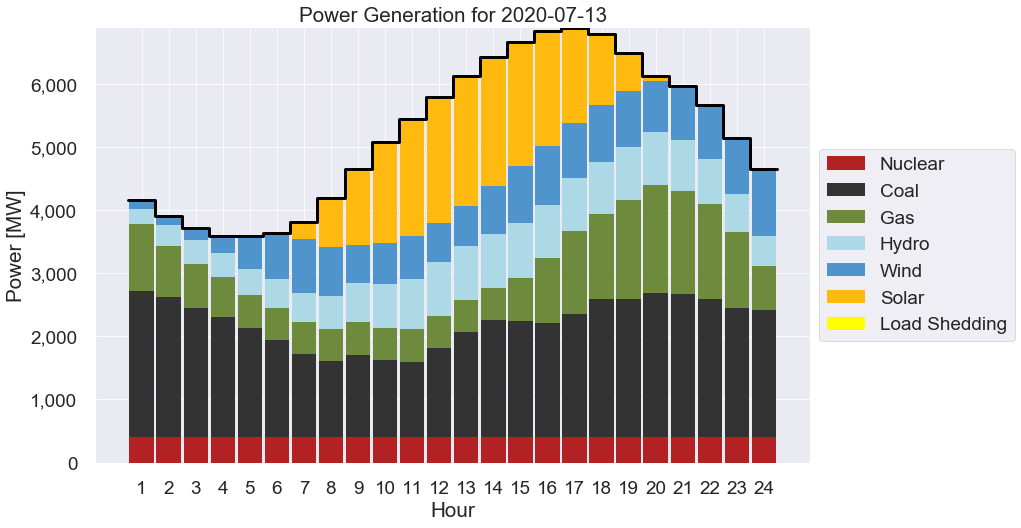

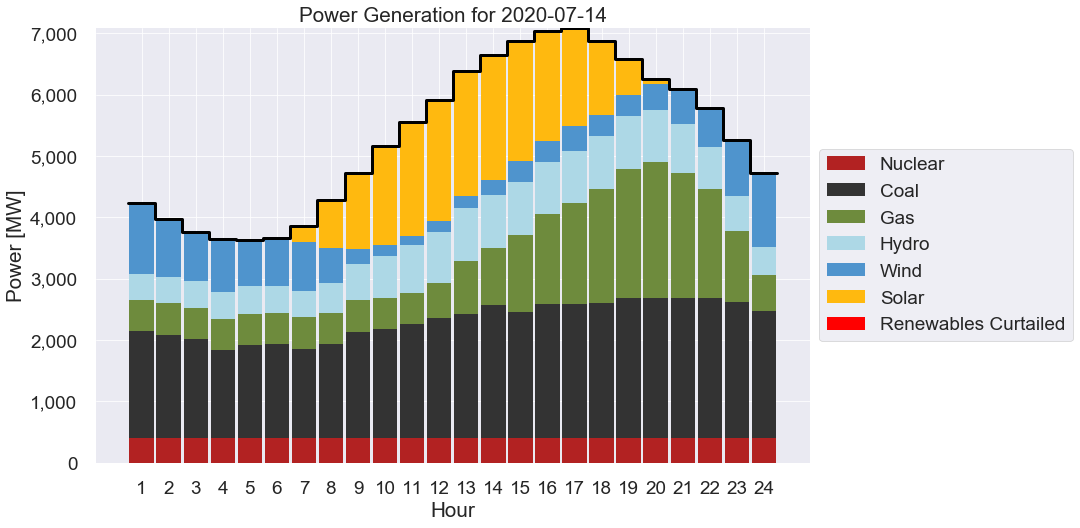

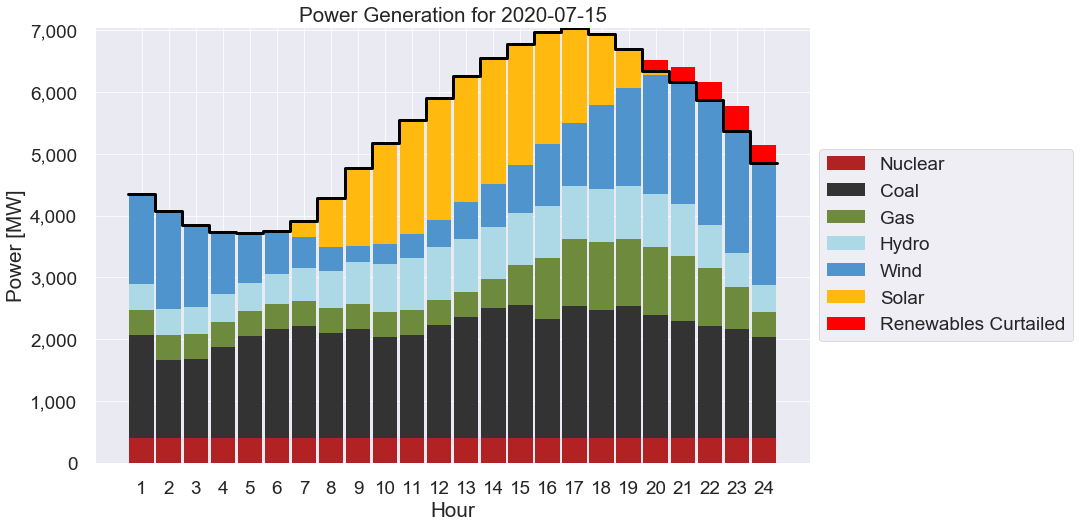

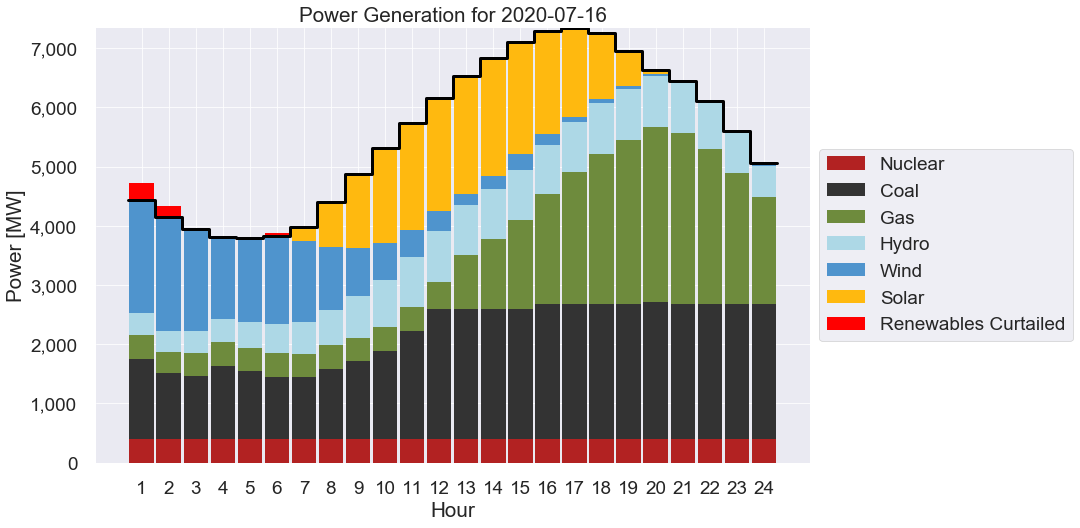

In [61]:
for date in thermal_detail['Date'].unique():
    # Generate sample data for the day
    SAMPLE_THERMAL = thermal_detail.loc[thermal_detail['Date'] == date]
    SAMPLE_RENEWABLES = renewables_detail.loc[renewables_detail['Date'] == date]
    SAMPLE_HOURLY = hourly_summary.loc[hourly_summary['Date '] == date]
    SAMPLE_GENS = hourly_gen_summary.loc[hourly_gen_summary['Date'] == date]
    
    generate_stack_graph(SAMPLE_THERMAL, SAMPLE_RENEWABLES, SAMPLE_HOURLY, SAMPLE_GENS, 
                         plot_individual_generators=False, show_individual_components=False, 
                         title='Power Generation for {0}'.format(date))

## Egret solve interface

In [12]:
import json
import math

from pyomo.opt import SolverFactory, TerminationCondition
from pyomo.core.plugins.transform.relax_integrality \
        import RelaxIntegrality
from egret.models.unit_commitment import *
from egret.data.model_data import ModelData

In [13]:
test_cases = [os.path.join('..', 'models', 'tests', 'uc_test_instances', 'test_case_{}.json'.format(i)) for i in range(1,2)]
test_int_objvals = [4201915.017320504, 5454367.7670904165, 5999272.361123627, 5461120.3231092375, 6062406.32677043]

for test_case, ref_objval in zip(test_cases, test_int_objvals):
    
    md_dict = json.load(open(test_case,'r'))
    md = ModelData(md_dict)

    model = create_tight_unit_commitment_model(md, relaxed=True)
    opt = SolverFactory('cbc')

    result = opt.solve(model, tee=False)

    assert result.solver.termination_condition == TerminationCondition.optimal
#     assert math.isclose(ref_objval, result.problem.upper_bound)

In [14]:
for gen in model.ThermalGenerators:
    for time_period in model.TimePeriods:
        print(gen, time_period, model.PowerGenerated[gen, time_period].expr())

GEN1_0_t 1 455.0
GEN1_0_t 2 455.0
GEN1_0_t 3 455.0
GEN1_0_t 4 455.0
GEN1_0_t 5 455.0
GEN1_0_t 6 455.0
GEN1_0_t 7 455.0
GEN1_0_t 8 455.0
GEN1_0_t 9 455.0
GEN1_0_t 10 455.0
GEN1_0_t 11 455.0
GEN1_0_t 12 455.0
GEN1_0_t 13 455.0
GEN1_0_t 14 455.0
GEN1_0_t 15 455.0
GEN1_0_t 16 455.0
GEN1_0_t 17 455.0
GEN1_0_t 18 455.0
GEN1_0_t 19 455.0
GEN1_0_t 20 455.0
GEN1_0_t 21 455.0
GEN1_0_t 22 455.0
GEN1_0_t 23 455.0
GEN1_0_t 24 455.0
GEN1_1_t 1 455.0
GEN1_1_t 2 455.0
GEN1_1_t 3 455.0
GEN1_1_t 4 455.0
GEN1_1_t 5 455.0
GEN1_1_t 6 455.0
GEN1_1_t 7 455.0
GEN1_1_t 8 455.0
GEN1_1_t 9 455.0
GEN1_1_t 10 455.0
GEN1_1_t 11 455.0
GEN1_1_t 12 455.0
GEN1_1_t 13 455.0
GEN1_1_t 14 455.0
GEN1_1_t 15 455.0
GEN1_1_t 16 455.0
GEN1_1_t 17 455.0
GEN1_1_t 18 455.0
GEN1_1_t 19 455.0
GEN1_1_t 20 455.0
GEN1_1_t 21 455.0
GEN1_1_t 22 455.0
GEN1_1_t 23 455.0
GEN1_1_t 24 455.0
GEN1_10_t 1 230.0
GEN1_10_t 2 53.333334
GEN1_10_t 3 0.0
GEN1_10_t 4 0.0
GEN1_10_t 5 0.0
GEN1_10_t 6 0.0
GEN1_10_t 7 0.0
GEN1_10_t 8 0.0
GEN1_10_t 9 0.0
GE

In [15]:
md.attributes('generators')